# K-Means Clustering
### CMPE 255 — Data Mining

In this notebook I will:

- Generate a synthetic dataset  
- Implement K-Means **from scratch** (no sklearn for algorithm)  
- Visualize the clusters and centroids  
- Compute clustering quality metrics  
- Compare with sklearn's KMeans


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)
from sklearn.cluster import KMeans

plt.rcParams["figure.figsize"] = (6, 5)


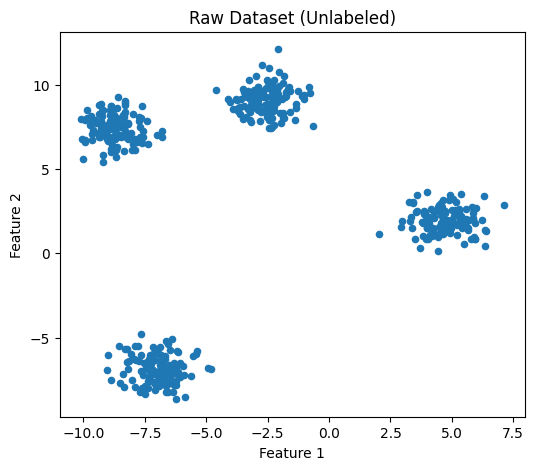

In [ ]:
# Generate synthetic data with 4 clusters
X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=0.8,
    random_state=42
)

# Visualize the raw data
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Raw Dataset (Unlabeled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
class KMeansScratch:
    def __init__(self, k=4, max_iters=100, tolerance=1e-4, random_state=None):
        self.k = k
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.random_state = random_state

    def _initialize_centroids(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        random_idx = np.random.choice(len(X), self.k, replace=False)
        return X[random_idx]

    def _compute_distances(self, X, centroids):
        # distances[j, i] = distance from X[i] to centroid j
        distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        return distances

    def _assign_clusters(self, distances):
        # for each point, pick the nearest centroid
        return np.argmin(distances, axis=0)

    def _update_centroids(self, X, labels):
        # recompute centroids as mean of assigned points
        new_centroids = np.array([
            X[labels == j].mean(axis=0) for j in range(self.k)
        ])
        return new_centroids

    def fit(self, X):
        self.centroids_ = self._initialize_centroids(X)

        for i in range(self.max_iters):
            old_centroids = self.centroids_.copy()

            # Step 1: compute distances
            distances = self._compute_distances(X, old_centroids)

            # Step 2: assign each point
            self.labels_ = self._assign_clusters(distances)

            # Step 3: update centroids
            self.centroids_ = self._update_centroids(X, self.labels_)

            # Step 4: check movement of centroids
            centroid_shift = np.linalg.norm(self.centroids_ - old_centroids)
            if centroid_shift < self.tolerance:
                break

        return self

    def predict(self, X):
        distances = self._compute_distances(X, self.centroids_)
        return self._assign_clusters(distances)


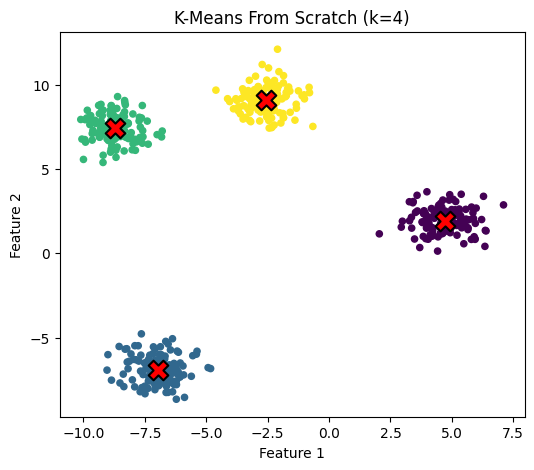

In [ ]:
k = 4  # number of clusters

kmeans_scratch = KMeansScratch(k=k, max_iters=100, random_state=42)
kmeans_scratch.fit(X)

labels_scratch = kmeans_scratch.labels_
centroids_scratch = kmeans_scratch.centroids_

plt.scatter(X[:, 0], X[:, 1], c=labels_scratch, s=20, cmap="viridis")
plt.scatter(
    centroids_scratch[:, 0],
    centroids_scratch[:, 1],
    s=200,
    c="red",
    marker="X",
    edgecolor="black",
    linewidth=1.5
)
plt.title(f"K-Means From Scratch (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
sil_scratch = silhouette_score(X, labels_scratch)
db_scratch = davies_bouldin_score(X, labels_scratch)
ch_scratch = calinski_harabasz_score(X, labels_scratch)

print("📌 Custom K-Means Metrics")
print(f"Silhouette Score       : {sil_scratch:.4f}")
print(f"Davies–Bouldin Index   : {db_scratch:.4f}")
print(f"Calinski–Harabasz Score: {ch_scratch:.4f}")


📌 Custom K-Means Metrics
Silhouette Score       : 0.8336
Davies–Bouldin Index   : 0.2341
Calinski–Harabasz Score: 8950.6246


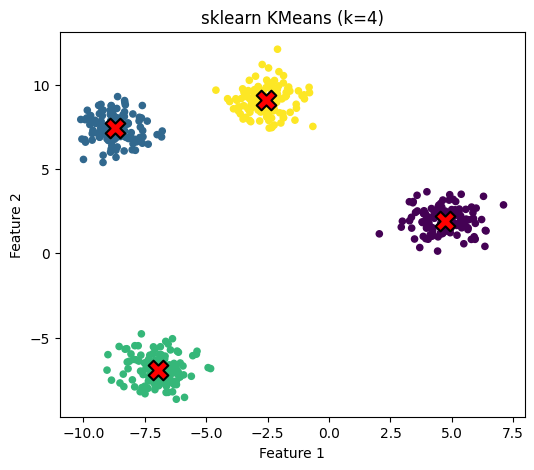

📌 sklearn KMeans Metrics
Silhouette Score       : 0.8336
Davies–Bouldin Index   : 0.2341
Calinski–Harabasz Score: 8950.6246


In [ ]:
kmeans_sklearn = KMeans(n_clusters=k, random_state=42, n_init="auto")
labels_sklearn = kmeans_sklearn.fit_predict(X)
centroids_sklearn = kmeans_sklearn.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, s=20, cmap="viridis")
plt.scatter(
    centroids_sklearn[:, 0],
    centroids_sklearn[:, 1],
    s=200,
    c="red",
    marker="X",
    edgecolor="black",
    linewidth=1.5
)
plt.title(f"sklearn KMeans (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

sil_sklearn = silhouette_score(X, labels_sklearn)
db_sklearn = davies_bouldin_score(X, labels_sklearn)
ch_sklearn = calinski_harabasz_score(X, labels_sklearn)

print("📌 sklearn KMeans Metrics")
print(f"Silhouette Score       : {sil_sklearn:.4f}")
print(f"Davies–Bouldin Index   : {db_sklearn:.4f}")
print(f"Calinski–Harabasz Score: {ch_sklearn:.4f}")


## Conclusion

- I implemented K-Means clustering **from scratch** using NumPy.
- I generated a 2D dataset with 4 clusters using `make_blobs`.
- My custom K-Means clustered the data and the centroids were similar to sklearn's KMeans.
- I computed clustering quality metrics:
  - Silhouette Score
  - Davies–Bouldin Index
  - Calinski–Harabasz Score
- The scores of my implementation were close to sklearn's implementation, which shows that my code is correct.
